## Data Analysis

In [486]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import ccf
import numpy as np
import math as math

In [487]:
storage_path = "../data/gold/monthly_registration_volume_gold.parquet"
#storage_path = "../data/processed/historical_consumer_price_index.parquet"
df = pd.read_parquet(storage_path, engine='pyarrow')
df.head()

Date                             ts_key  Value  Employment_Level  \
0 2018-01-31  ALFA ROMEO_GIULIA_All_Wheel_Drive   54.0          32504413   
1 2018-02-28  ALFA ROMEO_GIULIA_All_Wheel_Drive   23.0          32550748   
2 2018-03-31  ALFA ROMEO_GIULIA_All_Wheel_Drive   85.0          32660492   
3 2018-04-30  ALFA ROMEO_GIULIA_All_Wheel_Drive   51.0          32782173   
4 2018-05-31  ALFA ROMEO_GIULIA_All_Wheel_Drive   77.0          32857311   

   Employment_Level_Change  Employment_Level_Relative_Change  \
0                -104455.0                          -0.00320   
1                  46335.0                           0.00143   
2                 109744.0                           0.00337   
3                 121681.0                           0.00373   
4                  75138.0                           0.00229   

   Employment_Level_YoY_Change  Employment_Level_YoY_Relative_Change  \
0                     796982.0                               0.02514   
1                     776950.0                               0.02445   
2                     730269.0                               0.02287   
3                     768929.0                               0.02402   
4                     725968.0                               0.02259   

   Employment_Level_MA_3  Employment_Level_MA_6  consumer_price_index  \
0           3.264763e+07           3.264138e+07                  96.4   
1           3.255468e+07           3.266715e+07                  96.7   
2           3.257188e+07           3.265527e+07                  97.2   
3           3.266447e+07           3.265605e+07                  97.5   
4           3.276666e+07           3.266067e+07                  98.2   

   YoY_change  MoM_change  Deposit_Rate  Deposit_Rate_Change  \
0         1.4      0.0031          -0.4                  0.0   
1         1.2      0.0031          -0.4                  0.0   
2         1.5      0.0052          -0.4                  0.0   
3         1.4      0.0031          -0.4                  0.0   
4         2.1      0.0072          -0.4                  0.0   

   Deposit_Rate_Relative_Change  Deposit_Rate_YoY_Change     GDP  \
0                           0.0                      0.0  104.34   
1                           0.0                      0.0  104.34   
2                           0.0                      0.0  102.81   
3                           0.0                      0.0  102.81   
4                           0.0                      0.0  102.81   

   Lending_Rate  Lending_Rate_Change  Lending_Rate_Relative_Change  \
0          0.25                  0.0                           0.0   
1          0.25                  0.0                           0.0   
2          0.25                  0.0                           0.0   
3          0.25                  0.0                           0.0   
4          0.25                  0.0                           0.0   

   Lending_Rate_YoY_Change  Lending_Rate_YoY_Relative_Change  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   

   GR_price_with_tax_euro95  GR_price_with_tax_diesel  \
0                    1550.0                    1326.0   
1                    1550.0                    1325.0   
2                    1533.0                    1309.0   
3                    1575.0                    1348.0   
4                    1647.0                    1420.0   

   GR_price_with_tax_heGRing_oil  GR_price_with_tax_fuel_oil_1  
0                         1018.0                        442.14  
1                         1010.0                        424.16  
2                          991.0                        431.53  
3                         1025.0                        453.57  
4                         

In [488]:
df.shape

(107922, 27)

In [489]:
#How mandy unique values are in column ts_key
df['ts_key'].nunique()

1502

In [490]:
df.describe(include='number')

Value  Employment_Level  Employment_Level_Change  \
count  107922.000000      1.079220e+05            107922.000000   
mean      432.672254      3.422524e+07             27829.439716   
std       874.724017      7.264338e+05            142633.827046   
min         0.000000      3.250441e+07           -227686.000000   
25%         4.000000      3.361020e+07            -49205.000000   
50%        88.000000      3.444509e+07             23005.000000   
75%       459.000000      3.486330e+07             78233.000000   
max     22335.000000      3.523686e+07            328333.000000   

       Employment_Level_Relative_Change  Employment_Level_YoY_Change  \
count                     107922.000000                107922.000000   
mean                           0.000828                326445.659189   
std                            0.004176                269263.990743   
min                           -0.006760               -146294.000000   
25%                           -0.001420                 96509.000000   
50%                            0.000660                316745.000000   
75%                            0.002290                575362.000000   
max                            0.009760                796982.000000   

       Employment_Level_YoY_Relative_Change  Employment_Level_MA_3  \
count                         107922.000000           1.079220e+05   
mean                               0.009776           3.419907e+07   
std                                0.008210           7.263379e+05   
min                               -0.004310           3.255468e+07   
25%                                0.002750           3.357897e+07   
50%                                0.009220           3.438234e+07   
75%                                0.016780           3.485102e+07   
max                                0.025140           3.522653e+07   

       Employment_Level_MA_6  consumer_price_index     YoY_change  \
count           1.079220e+05         107922.000000  107922.000000   
mean            3.416495e+07            109.419291       3.119176   
std             7.310082e+05              9.077779       2.362142   
min             3.264138e+07             96.400000      -0.600000   
25%             3.359857e+07            100.100000       1.600000   
50%             3.430897e+07            109.800000       2.200000   
75%             3.484062e+07            118.600000       4.300000   
max             3.507294e+07            122.600000       8.800000   

          MoM_change   Deposit_Rate  Deposit_Rate_Change  \
count  107922.000000  107922.000000        107922.000000   
mean        0.002613       1.146162             0.023221   
std         0.004190       1.828114             0.180652   
min        -0.008100      -0.500000            -0.250000   
25%         0.000800      -0.500000             0.000000   
50%         0.002600      -0.400000             0.000000   
75%         0.004300       3.000000             0.000000   
max         0.019800       4.000000             0.750000   

       Deposit_Rate_Relative_Change  Deposit_Rate_YoY_Change            GDP  \
count                 107922.000000            107922.000000  107922.000000   
mean                       0.006211                 0.389422     103.886658   
std                        0.160245                 1.403329       2.547734   
min                       -1.000000                -1.750000      91.660000   
25%                        0.000000                -0.100000     102.740000   
50%                        0.000000                 0.000000     104.480000   
75%                        0.000000                 0.500000     105.470000   
max                        1.000000                 4.000000     107.020000   

        Lending_Rate  Lending_Rate_Change  Lending_Rate_Relative_Change  \
count  107922.000000        107922.000000                 107922.000000   
mean        1.817026             0.019529                      0.038314   
std         1.799459           

In [491]:
#Shoq all columns in the df.info() output
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107922 entries, 0 to 107921
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date                                  107922 non-null  datetime64[ns]
 1   ts_key                                107922 non-null  object        
 2   Value                                 107922 non-null  float64       
 3   Employment_Level                      107922 non-null  int64         
 4   Employment_Level_Change               107922 non-null  float64       
 5   Employment_Level_Relative_Change      107922 non-null  float64       
 6   Employment_Level_YoY_Change           107922 non-null  float64       
 7   Employment_Level_YoY_Relative_Change  107922 non-null  float64       
 8   Employment_Level_MA_3                 107922 non-null  float64       
 9   Employment_Level_MA_6                 107922 non-null  floa

In [492]:
#parse the first term befor the underscore in column ts_key and write it to new column oem
df["oem"] = df["ts_key"].str.extract(r"^([^_]+)_")

df['oem'].unique()

array(['ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BYD', 'CADILLAC', 'CITROEN', 'DACIA', 'FERRARI', 'FIAT', 'FISKER',
       'FORD', 'GWM', 'HONDA', 'HYUNDAI', 'INEOS', 'IVECO', 'JAGUAR',
       'JEEP', 'KIA', 'LADA', 'LAMBORGHINI', 'LAND ROVER', 'LEAPMOTOR',
       'LEXUS', 'LOTUS', 'LUCID', 'LYNK & CO', 'MAN', 'MASERATI', 'MAXUS',
       'MAZDA', 'MERCEDES', 'MG ROEWE', 'MINI', 'MITSUBISHI', 'MORGAN',
       'NIO', 'NISSAN', 'OPEL', 'PEUGEOT', 'POLESTAR', 'PORSCHE',
       'RENAULT', 'ROLLS ROYCE', 'SEAT', 'SKODA', 'SMART', 'SUBARU',
       'SUZUKI', 'TESLA', 'TOYOTA', 'VINFAST', 'VOLVO', 'VW', 'XPENG'],
      dtype=object)

In [493]:
types = [
    "All_Wheel_Drive",
    "Diesel",
    "Petrol",
    "Total",
    "BEV",
    "Hybrid",
    "Convertibles"
]

pattern = "(" + "|".join(types) + ")"

df["type"] = df["ts_key"].str.extract(pattern)

#show all null values in new column type
df['type'].unique()

array(['All_Wheel_Drive', 'Diesel', 'Petrol', 'Total', 'BEV', 'Hybrid',
       'Convertibles'], dtype=object)

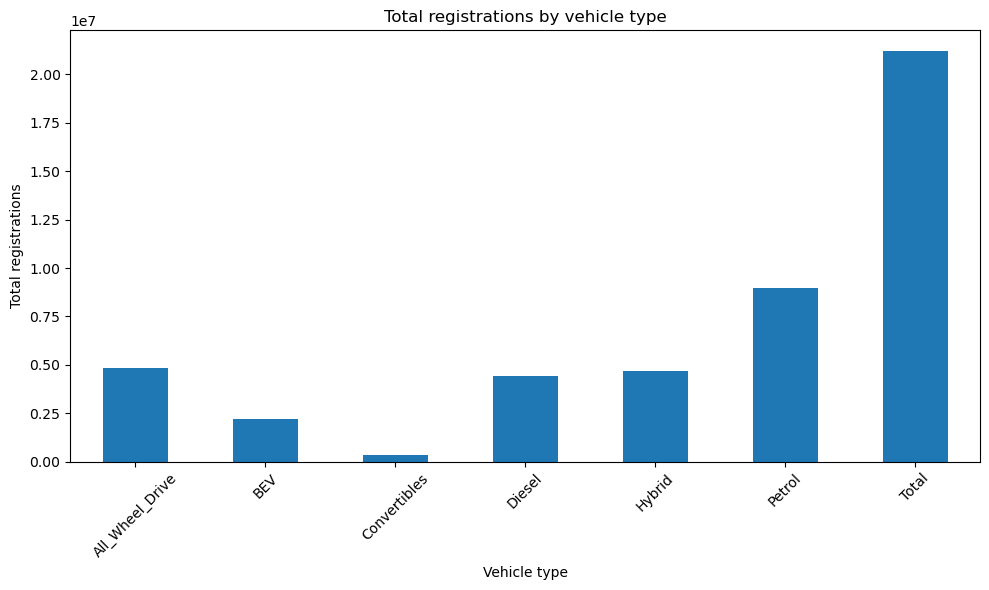

In [494]:
sum_by_type = df.groupby("type")["Value"].sum()

plt.figure(figsize=(10, 6))
sum_by_type.plot(kind="bar")
plt.ylabel("Total registrations")
plt.xlabel("Vehicle type")
plt.title("Total registrations by vehicle type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

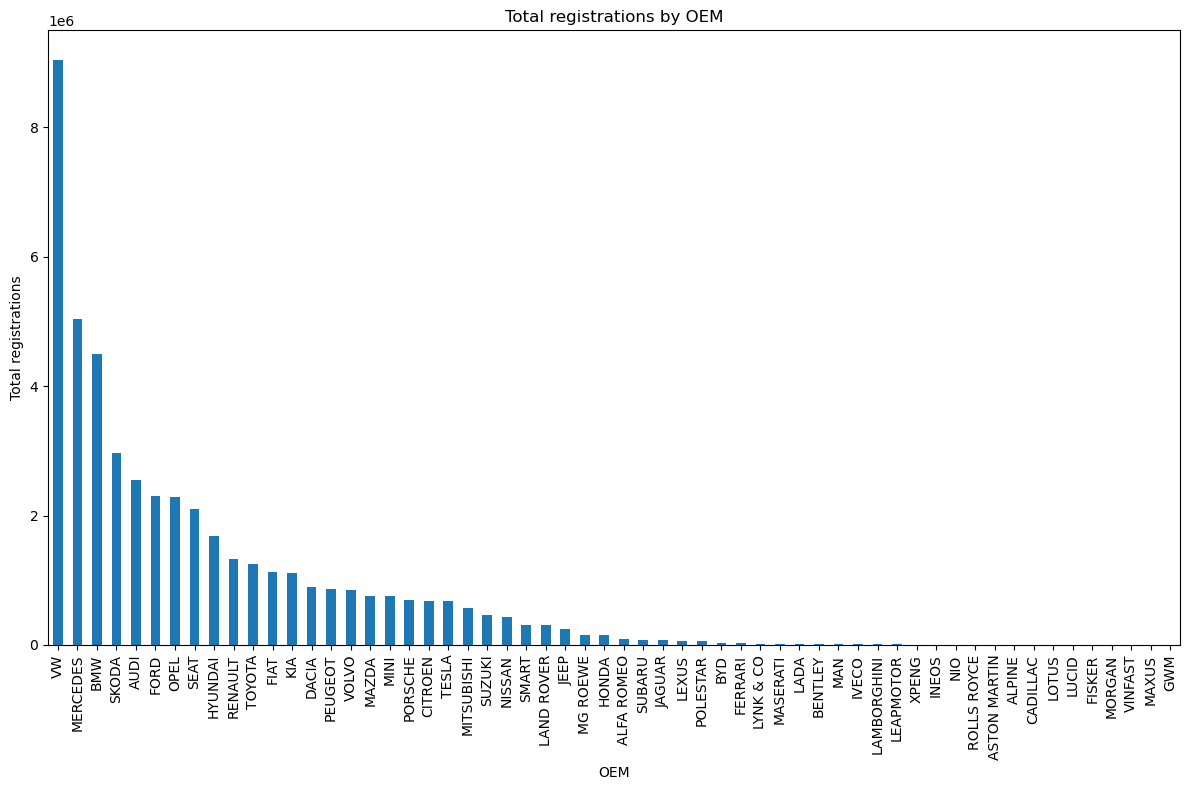

In [495]:
sum_by_oem = df.groupby("oem")["Value"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sum_by_oem.plot(kind="bar")
plt.ylabel("Total registrations")
plt.xlabel("OEM")
plt.title("Total registrations by OEM")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Static Correlation

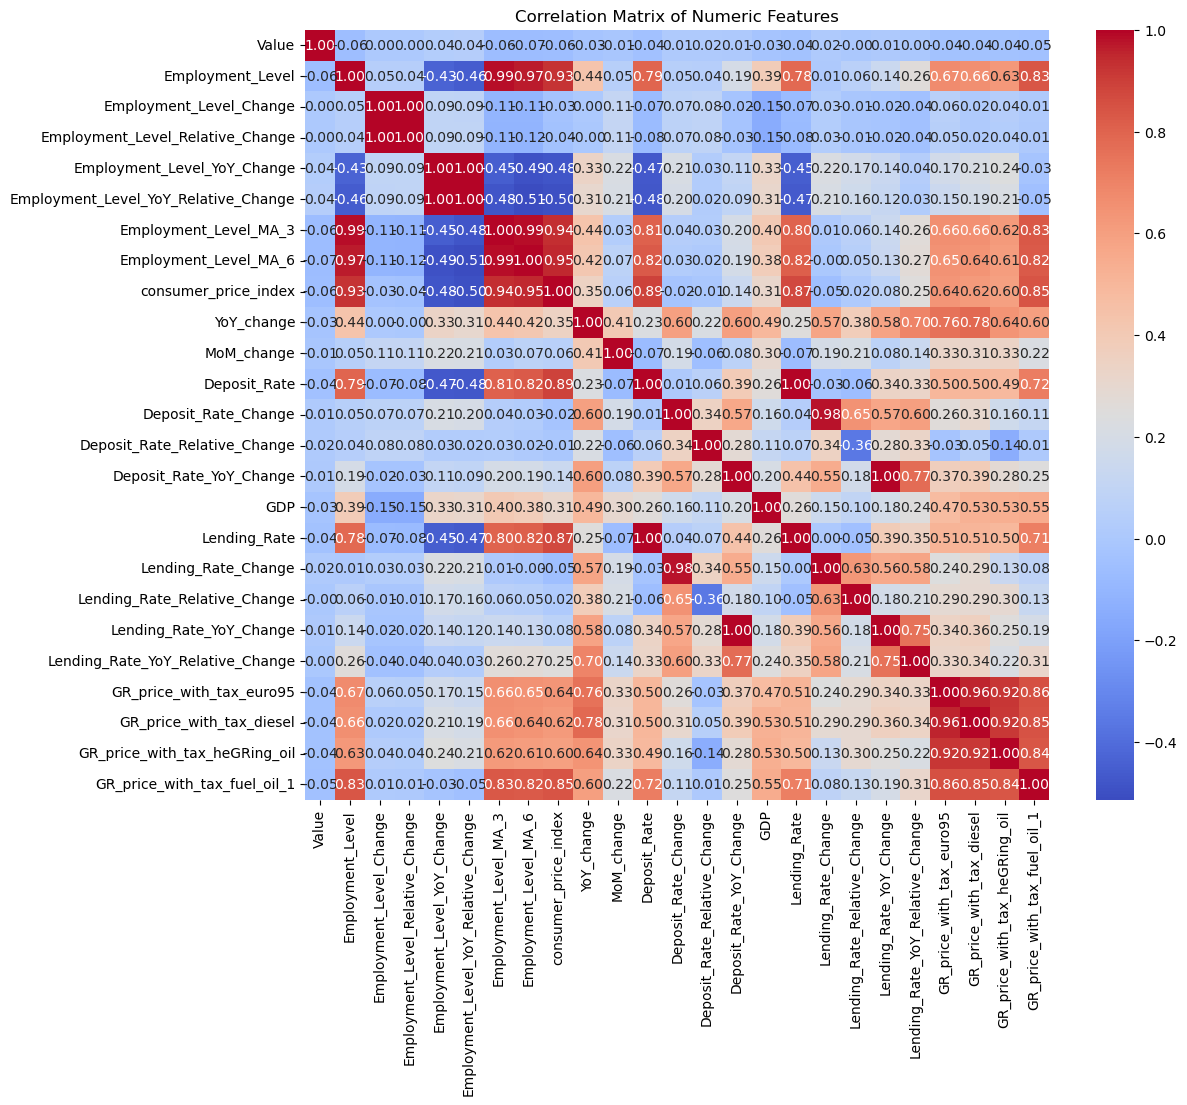

In [496]:
# build dataframe with all numeric columns only
numeric_df = df.select_dtypes(include=['number'])   
# show correlation matrix of numeric columns

plt.figure(figsize=(12,10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [497]:

types = df['type'].unique().tolist()
num_cols = df.select_dtypes(include="number").columns

corr_list = []
for t in types:
    corr_t = (
        df[df["type"] == t][num_cols]
        .corr()["Value"]
        .drop("Value")
        .rename(t)
    )
    corr_list.append(corr_t)

corr_table = pd.concat(corr_list, axis=1).round(2)

styled = (
    corr_table
    .style
    .background_gradient(
        cmap="RdBu_r",   # rot = negativ, blau = positiv
        axis=None,
        vmin=-1, vmax=1
    )

)

styled


In [498]:
oems_top20 = (
    df.groupby("oem")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(40)
    .index
    .tolist()
)

In [499]:
num_cols = df.select_dtypes(include="number").columns

corr_list = []
for t in oems_top20:
    corr_t = (
        df[df["oem"] == t][num_cols]
        .corr()["Value"]
        .drop("Value")
        .rename(t)
    )
    corr_list.append(corr_t)

corr_table = pd.concat(corr_list, axis=1).round(2)

styled = (corr_table.style.background_gradient(cmap="RdBu", vmin=-1, vmax=1))

styled

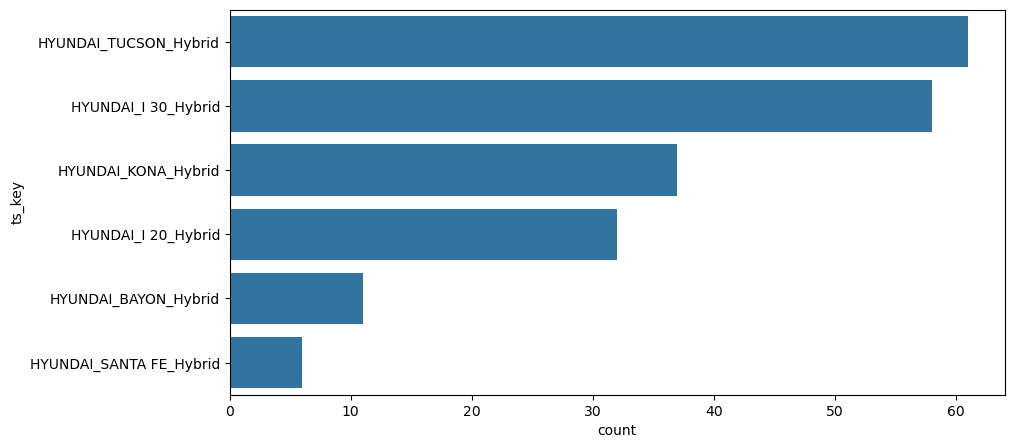

In [500]:
df_hyundai = df[df["oem"] == "HYUNDAI"]
df_hyundai_hybrid = df_hyundai[df_hyundai["type"] == "Hybrid"]
df_hyundai_hybrid = df_hyundai_hybrid[df_hyundai_hybrid["Value"]>300]
df_hyundai_hybrid.head()

# Visualization of the distribution of all samples over the 7 types
order = df_hyundai_hybrid["ts_key"].value_counts().index

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="ts_key", data=df_hyundai_hybrid, order=order, ax=ax)

plt.show()

In [501]:
#write all unique values in column ts_key of df_hyundai_hybrid
df_hyundai_hybrid['ts_key'].unique()

array(['HYUNDAI_BAYON_Hybrid', 'HYUNDAI_I 20_Hybrid',
       'HYUNDAI_I 30_Hybrid', 'HYUNDAI_KONA_Hybrid',
       'HYUNDAI_SANTA FE_Hybrid', 'HYUNDAI_TUCSON_Hybrid'], dtype=object)

### Time Trend Analysis

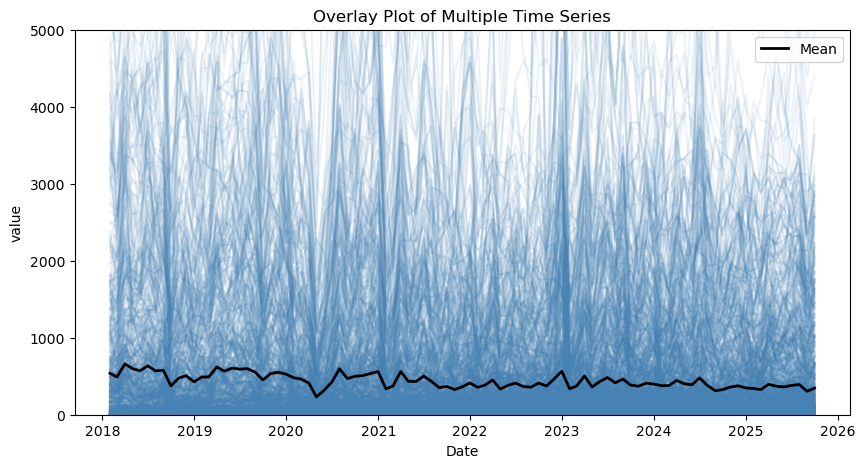

In [502]:
plt.figure(figsize=(10, 5))

for ts_key, g in df.groupby("ts_key"):
    plt.plot(g["Date"], g["Value"], alpha=0.1, color="steelblue")

plt.title("Overlay Plot of Multiple Time Series")
plt.xlabel("Date")
plt.ylabel("value")

mean_series = df.groupby("Date")["Value"].mean()
plt.plot(mean_series.index, mean_series, color="black", linewidth=2, label="Mean")
plt.legend()

# set y-axis scale to a maximum of 5000
plt.ylim(0, 5000)

plt.show()

An overlay plot was used to visualize the temporal structure of a large number of time series. Each series was plotted with high transparency to reveal global trends and heterogeneity across the dataset.


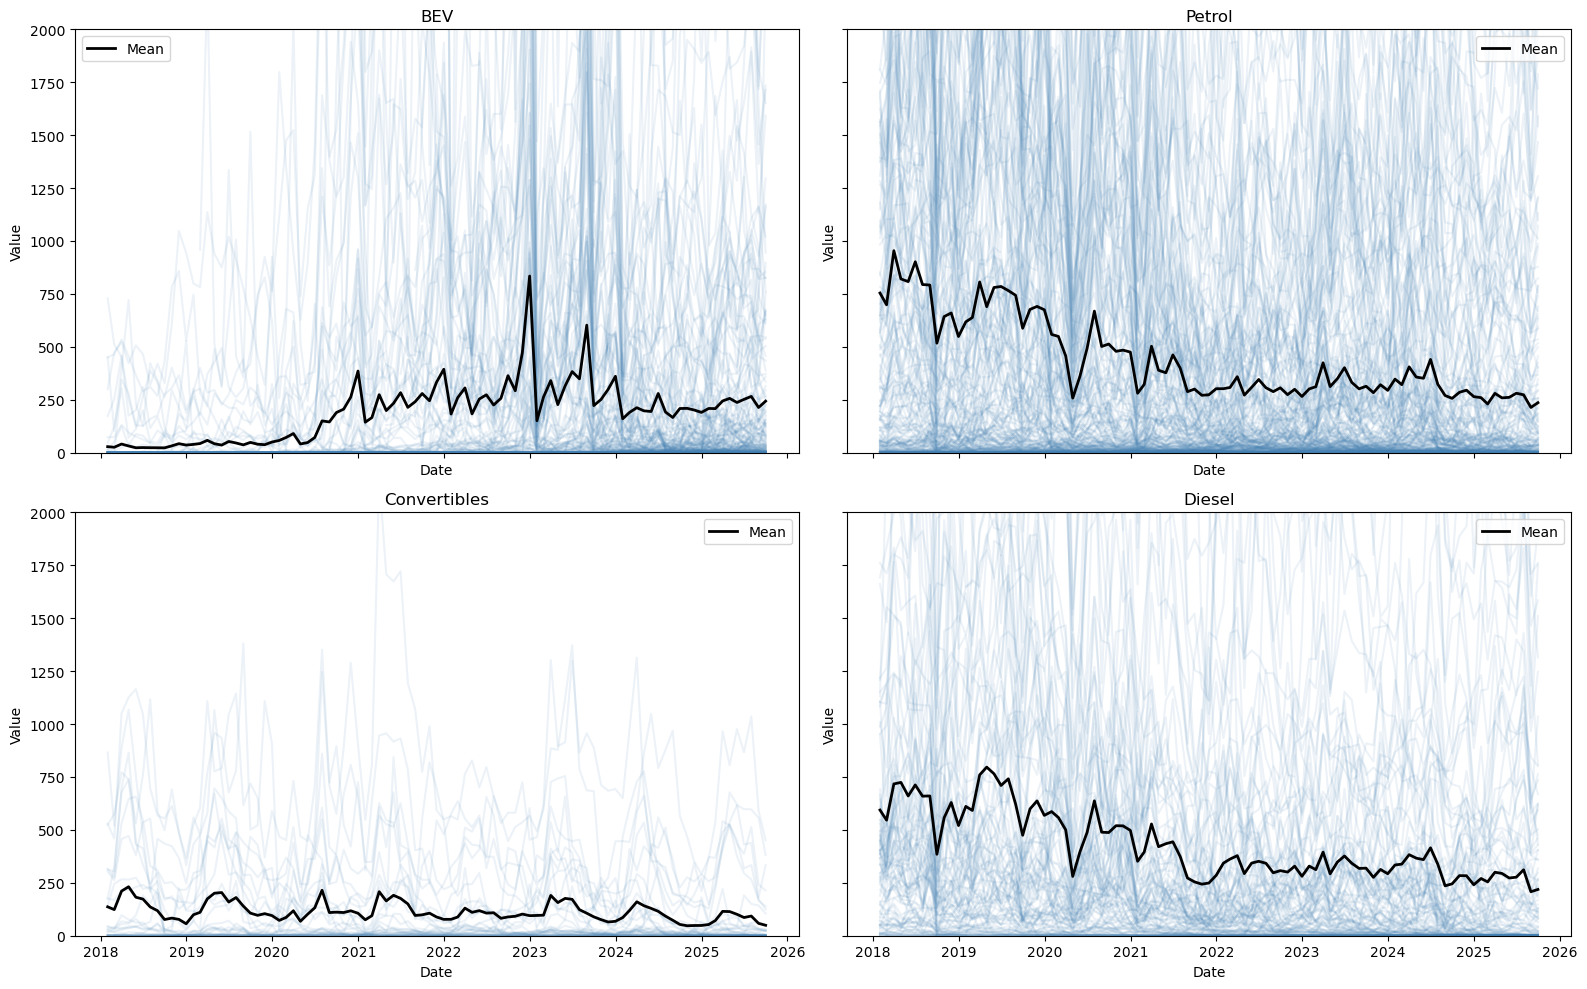

In [503]:
import matplotlib.pyplot as plt

vehicle_types = ["BEV", "Petrol", "Convertibles", "Diesel"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, v_type in zip(axes, vehicle_types):
    type_df = df[df["type"] == v_type].copy()
    type_df = type_df.sort_values("Date")

    # Overlay aller Zeitreihen
    for _, g in type_df.groupby("ts_key"):
        ax.plot(g["Date"], g["Value"], alpha=0.1, color="steelblue")

    # Mittelwert
    mean_series = type_df.groupby("Date")["Value"].mean()
    ax.plot(mean_series.index, mean_series, color="black", linewidth=2, label="Mean")

    ax.set_title(f"{v_type}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.set_ylim(0, 2000)
    ax.legend()

plt.tight_layout()
plt.show()


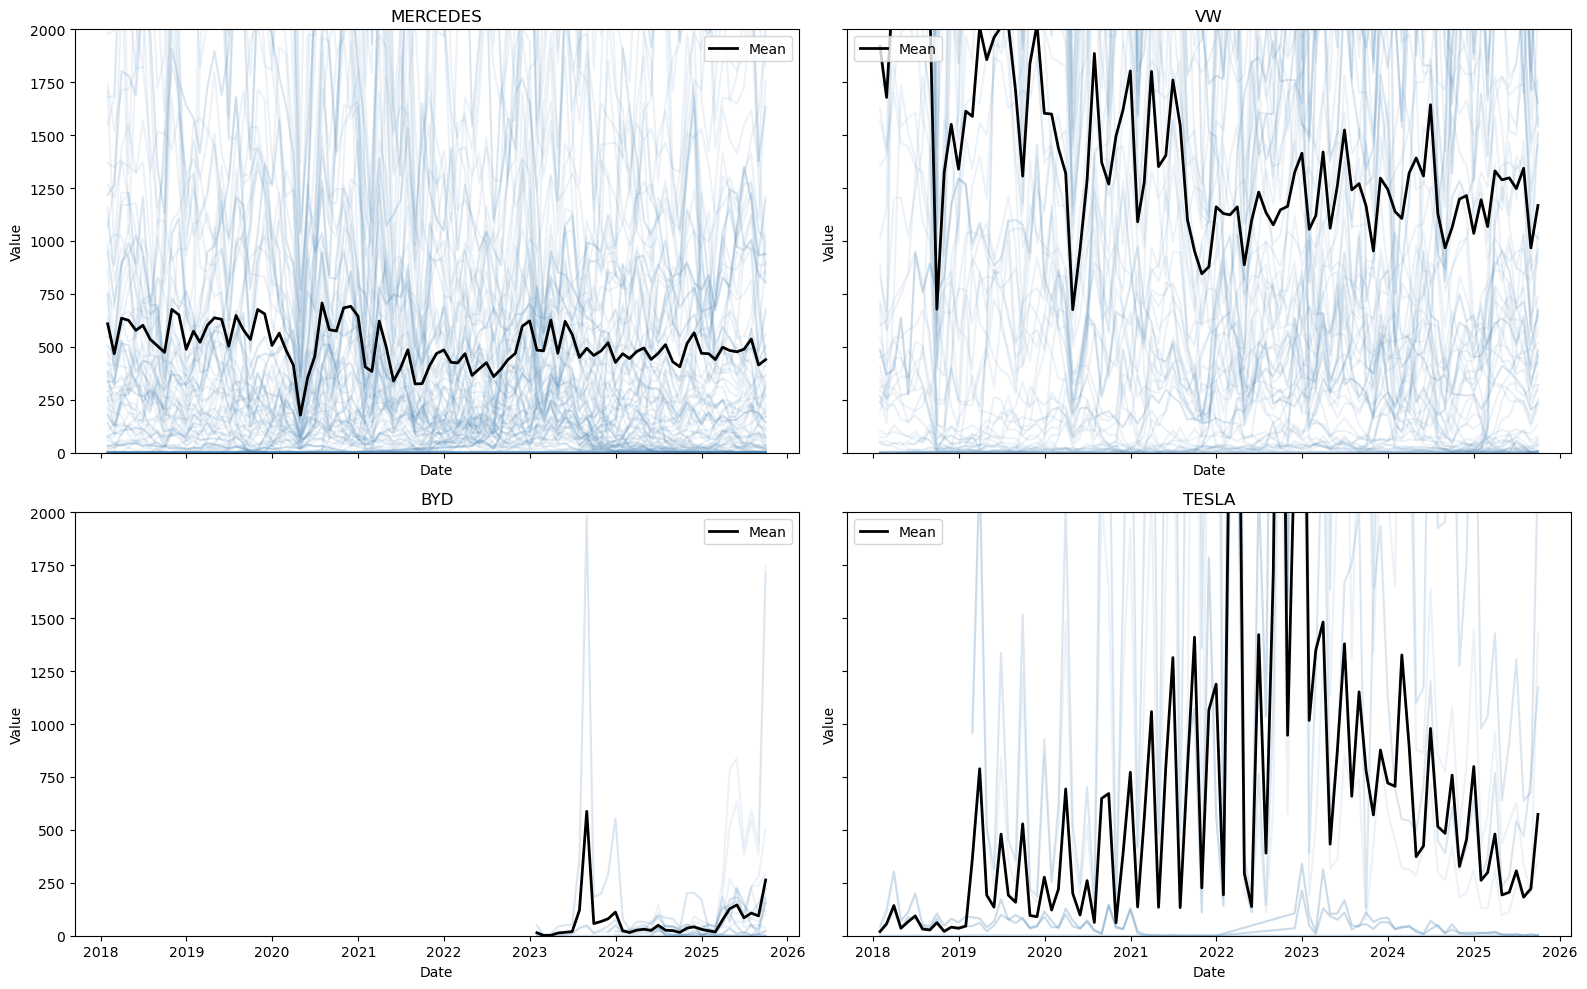

In [504]:
oems = ["MERCEDES", "VW", "BYD", "TESLA"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, v_type in zip(axes, oems):
    type_df = df[df["oem"] == v_type].copy()
    type_df = type_df.sort_values("Date")

    # Overlay aller Zeitreihen
    for _, g in type_df.groupby("ts_key"):
        ax.plot(g["Date"], g["Value"], alpha=0.1, color="steelblue")

    # Mittelwert
    mean_series = type_df.groupby("Date")["Value"].mean()
    ax.plot(mean_series.index, mean_series, color="black", linewidth=2, label="Mean")

    ax.set_title(f"{v_type}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.set_ylim(0, 2000)
    ax.legend()

plt.tight_layout()
plt.show()


When examining the registration numbers of battery electric vehicles (BEVs), random variations can be observed that cannot be attributed to trend or seasonal effects. These fluctuations are largely explained by changes in political support for this type of vehicle during specific time periods.

The overlay plot of petrol vehicle registration time series reveals a clear long-term downward trend. While individual time series exhibit substantial variability and short-term fluctuations, the aggregated mean (black line) shows a consistent decline over the observed period.

Registration numbers are relatively high in the early years (around 2018–2019), followed by a pronounced decrease starting in 2020. After this drop, the mean level remains persistently lower, with only minor short-term recoveries, indicating a structural change rather than a temporary fluctuation.

Overall, the trend suggests a sustained decline in petrol vehicle registrations over time, despite considerable heterogeneity across individual time series.*

When examining convertibles, a clear seasonality can be observed, characterized by a regular annual pattern since the beginning of the observation period.

The presence of such seasonal structures implies that machine learning models, particularly neural networks, must be capable of capturing periodic dependencies over time. This highlights the importance of incorporating sufficiently long input sequences or explicit seasonal features to enable the model to learn recurring annual patterns rather than treating them as noise.

###Autocorrelation

Autocorrelation shows how strongly current values of a time series depend on past values.
It helps identify whether the data contain meaningful temporal structure or are dominated by random noise.
Understanding autocorrelation is essential for selecting appropriate models and input sequence lengths, especially for neural networks such as LSTMs.
High autocorrelation indicates that past observations carry predictive information about future values.
Without analyzing autocorrelation, models may be poorly specified and fail to capture important temporal dependencies.

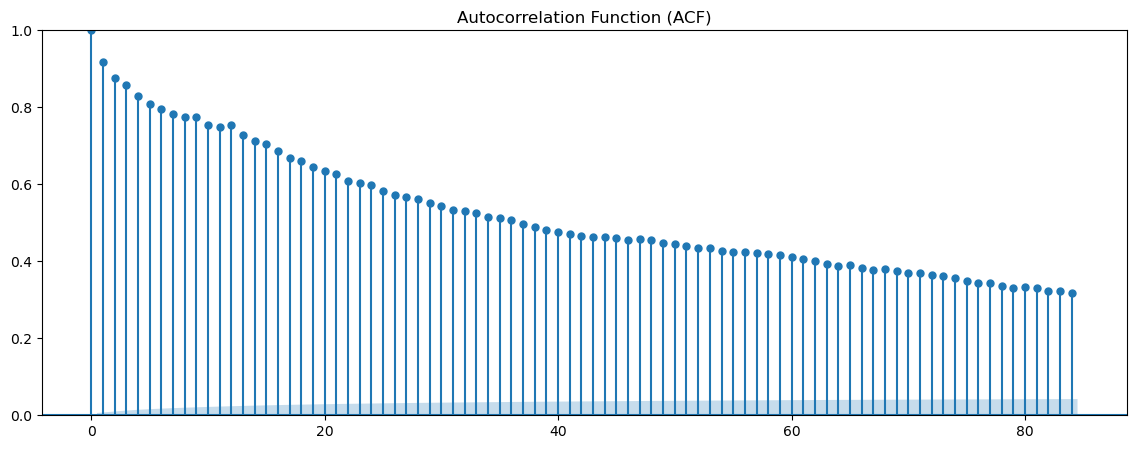

In [505]:
fig, ax = plt.subplots(figsize=(14, 5))

plot_acf(df["Value"], lags=84, ax=ax)

ax.set_title("Autocorrelation Function (ACF)")
ax.set_ylim(0, 1)

plt.show()

The autocorrelation function shows a strong and slowly decaying positive autocorrelation across many lags, indicating a highly persistent and non-stationary time series. The majority of autocorrelation values lie well outside the confidence interval, confirming that the temporal dependencies are statistically significant and not driven by random noise.

In addition to the average autocorrelation across all time series, category-specific autocorrelation analyses were conducted to account for structural heterogeneity between different powertrain types.

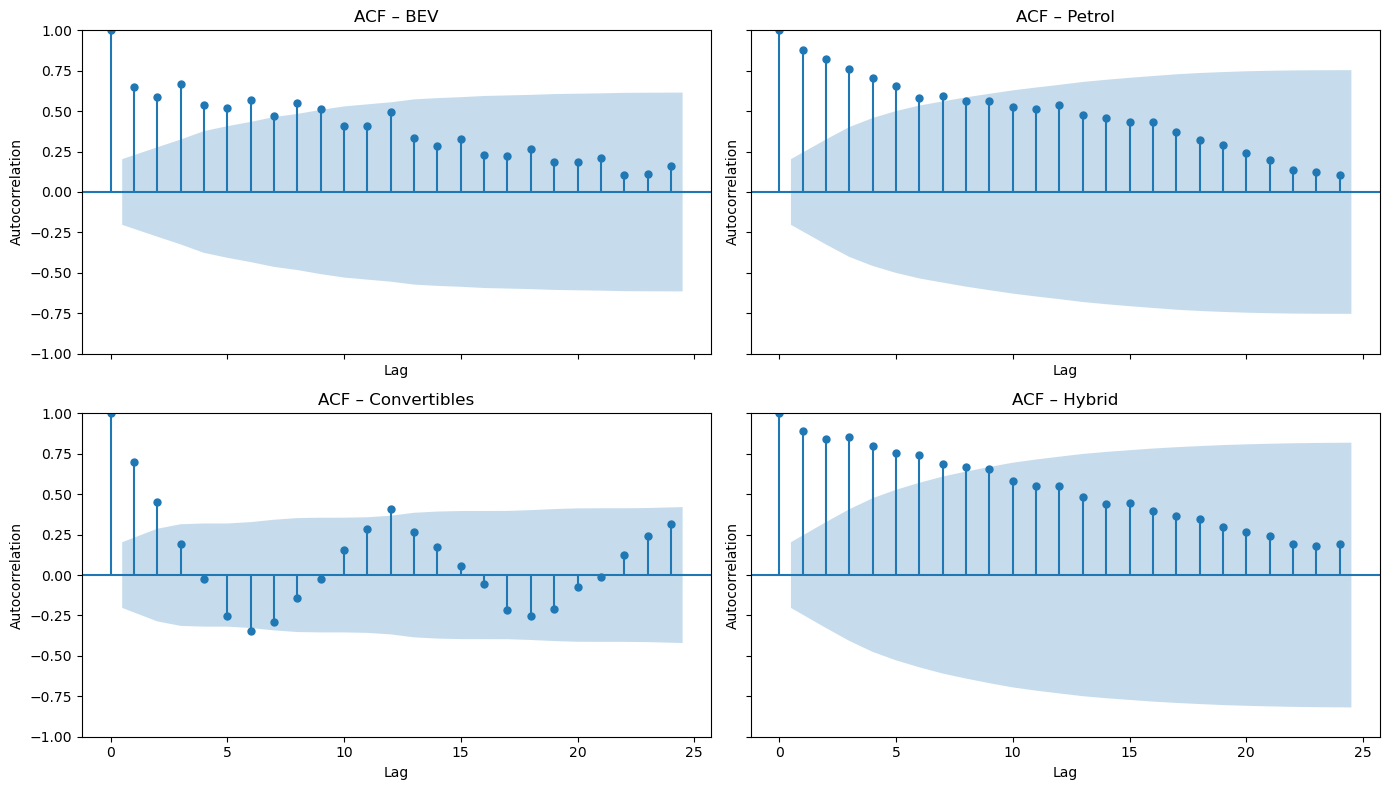

In [506]:
types = ["BEV", "Petrol", "Convertibles", "Hybrid"]

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, t in zip(axes, types):
    df_type = df[df["type"] == t].copy()
    df_type = df_type.sort_values("Date")

    # Aggregierte Zeitreihe (Mean pro Date)
    series = df_type.groupby("Date")["Value"].mean()
    series = series.dropna()

    plot_acf(series, lags=24, ax=ax)
    ax.set_title(f"ACF – {t}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

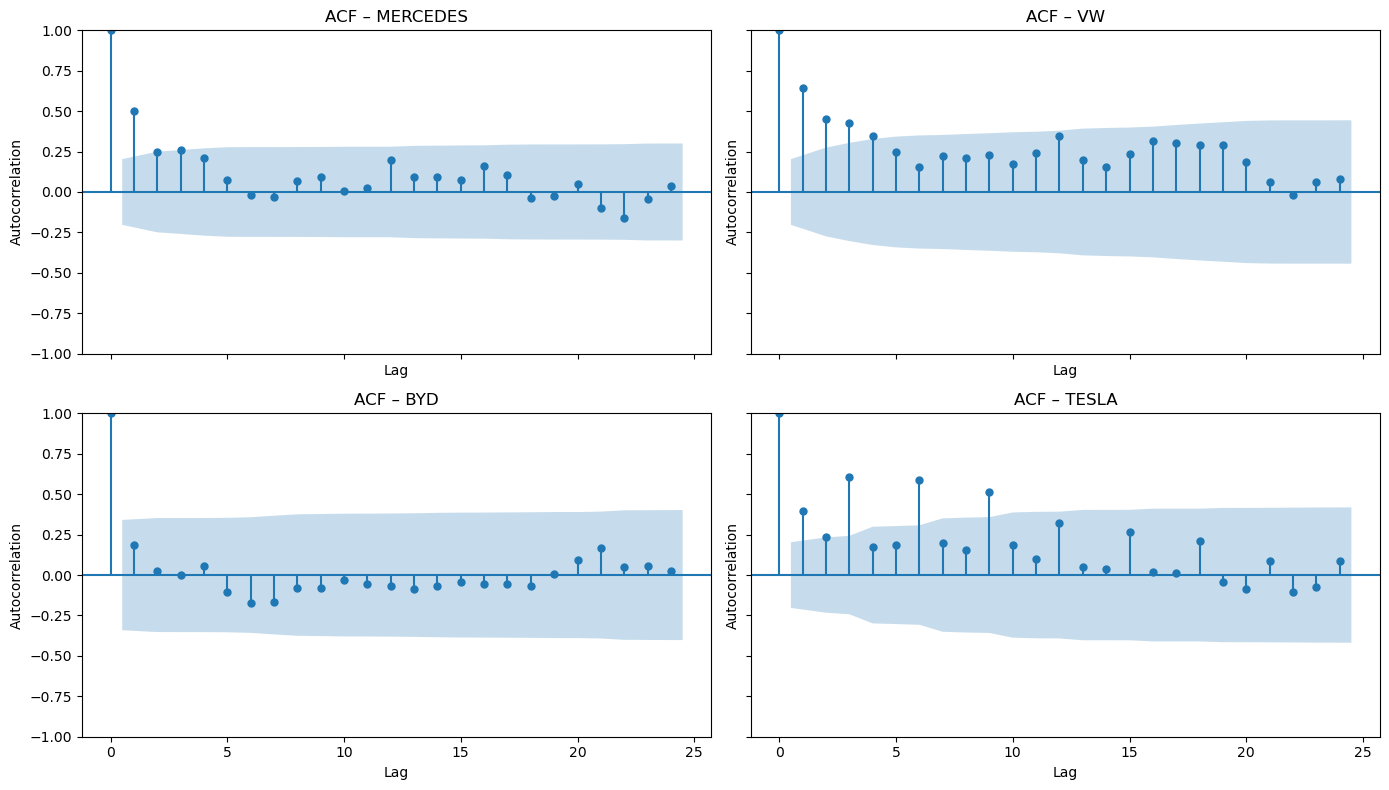

In [507]:
oems = ["MERCEDES", "VW", "BYD", "TESLA"]

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, oem in zip(axes, oems):
    df_oem = df[df["oem"] == oem].copy()
    df_oem = df_oem.sort_values("Date")

    # Aggregierte Zeitreihe (Mean pro Date)
    series = df_oem.groupby("Date")["Value"].mean()
    series = series.dropna()

    plot_acf(series, lags=24, ax=ax)
    ax.set_title(f"ACF – {oem}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

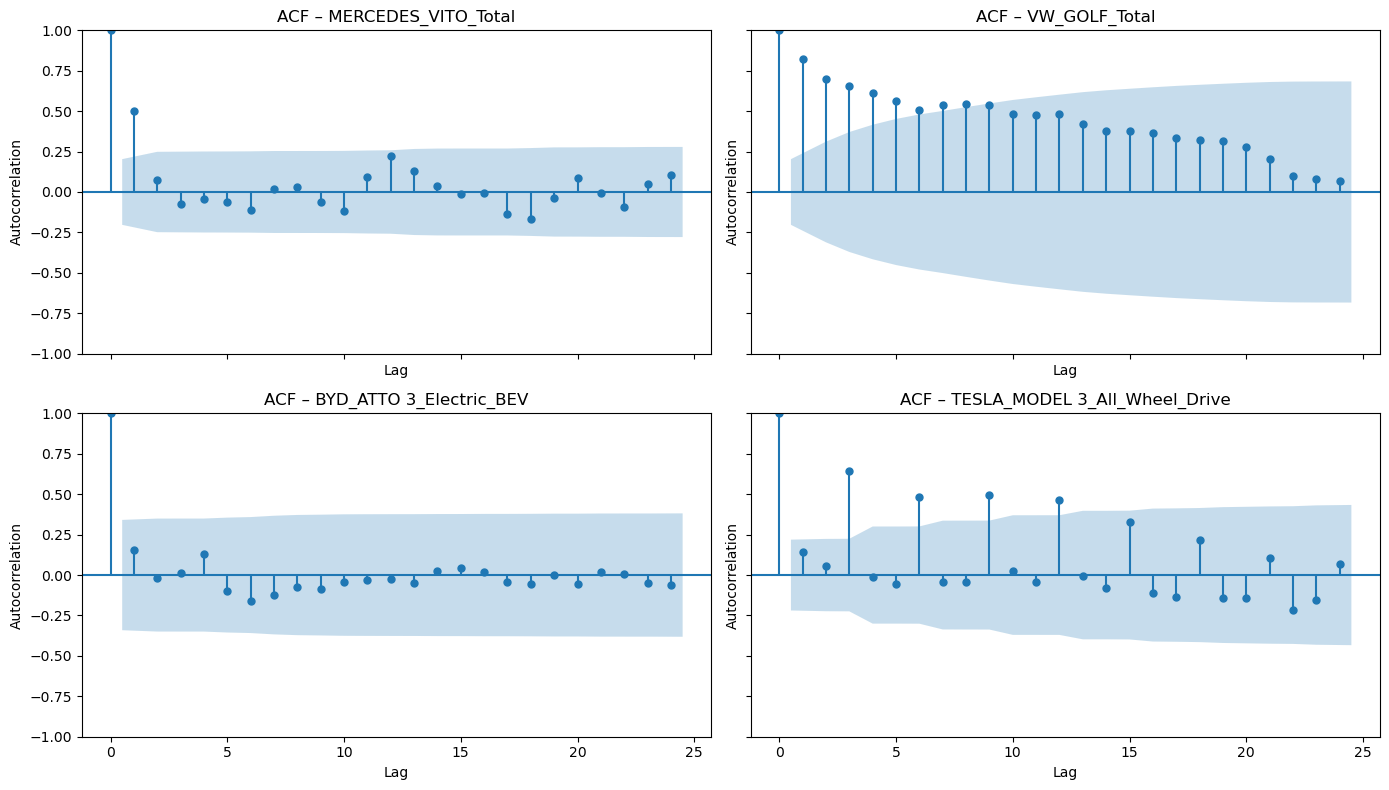

In [508]:
ts_keys = [
    "MERCEDES_VITO_Total",
    "VW_GOLF_Total",
    "BYD_ATTO 3_Electric_BEV",
    "TESLA_MODEL 3_All_Wheel_Drive"
]

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, key in zip(axes, ts_keys):
    df_ts = df[df["ts_key"] == key].copy()
    df_ts = df_ts.sort_values("Date")

    series = df_ts["Value"].dropna()

    plot_acf(series, lags=24, ax=ax)
    ax.set_title(f"ACF – {key}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()


### Time dependent mulitvariate correlation

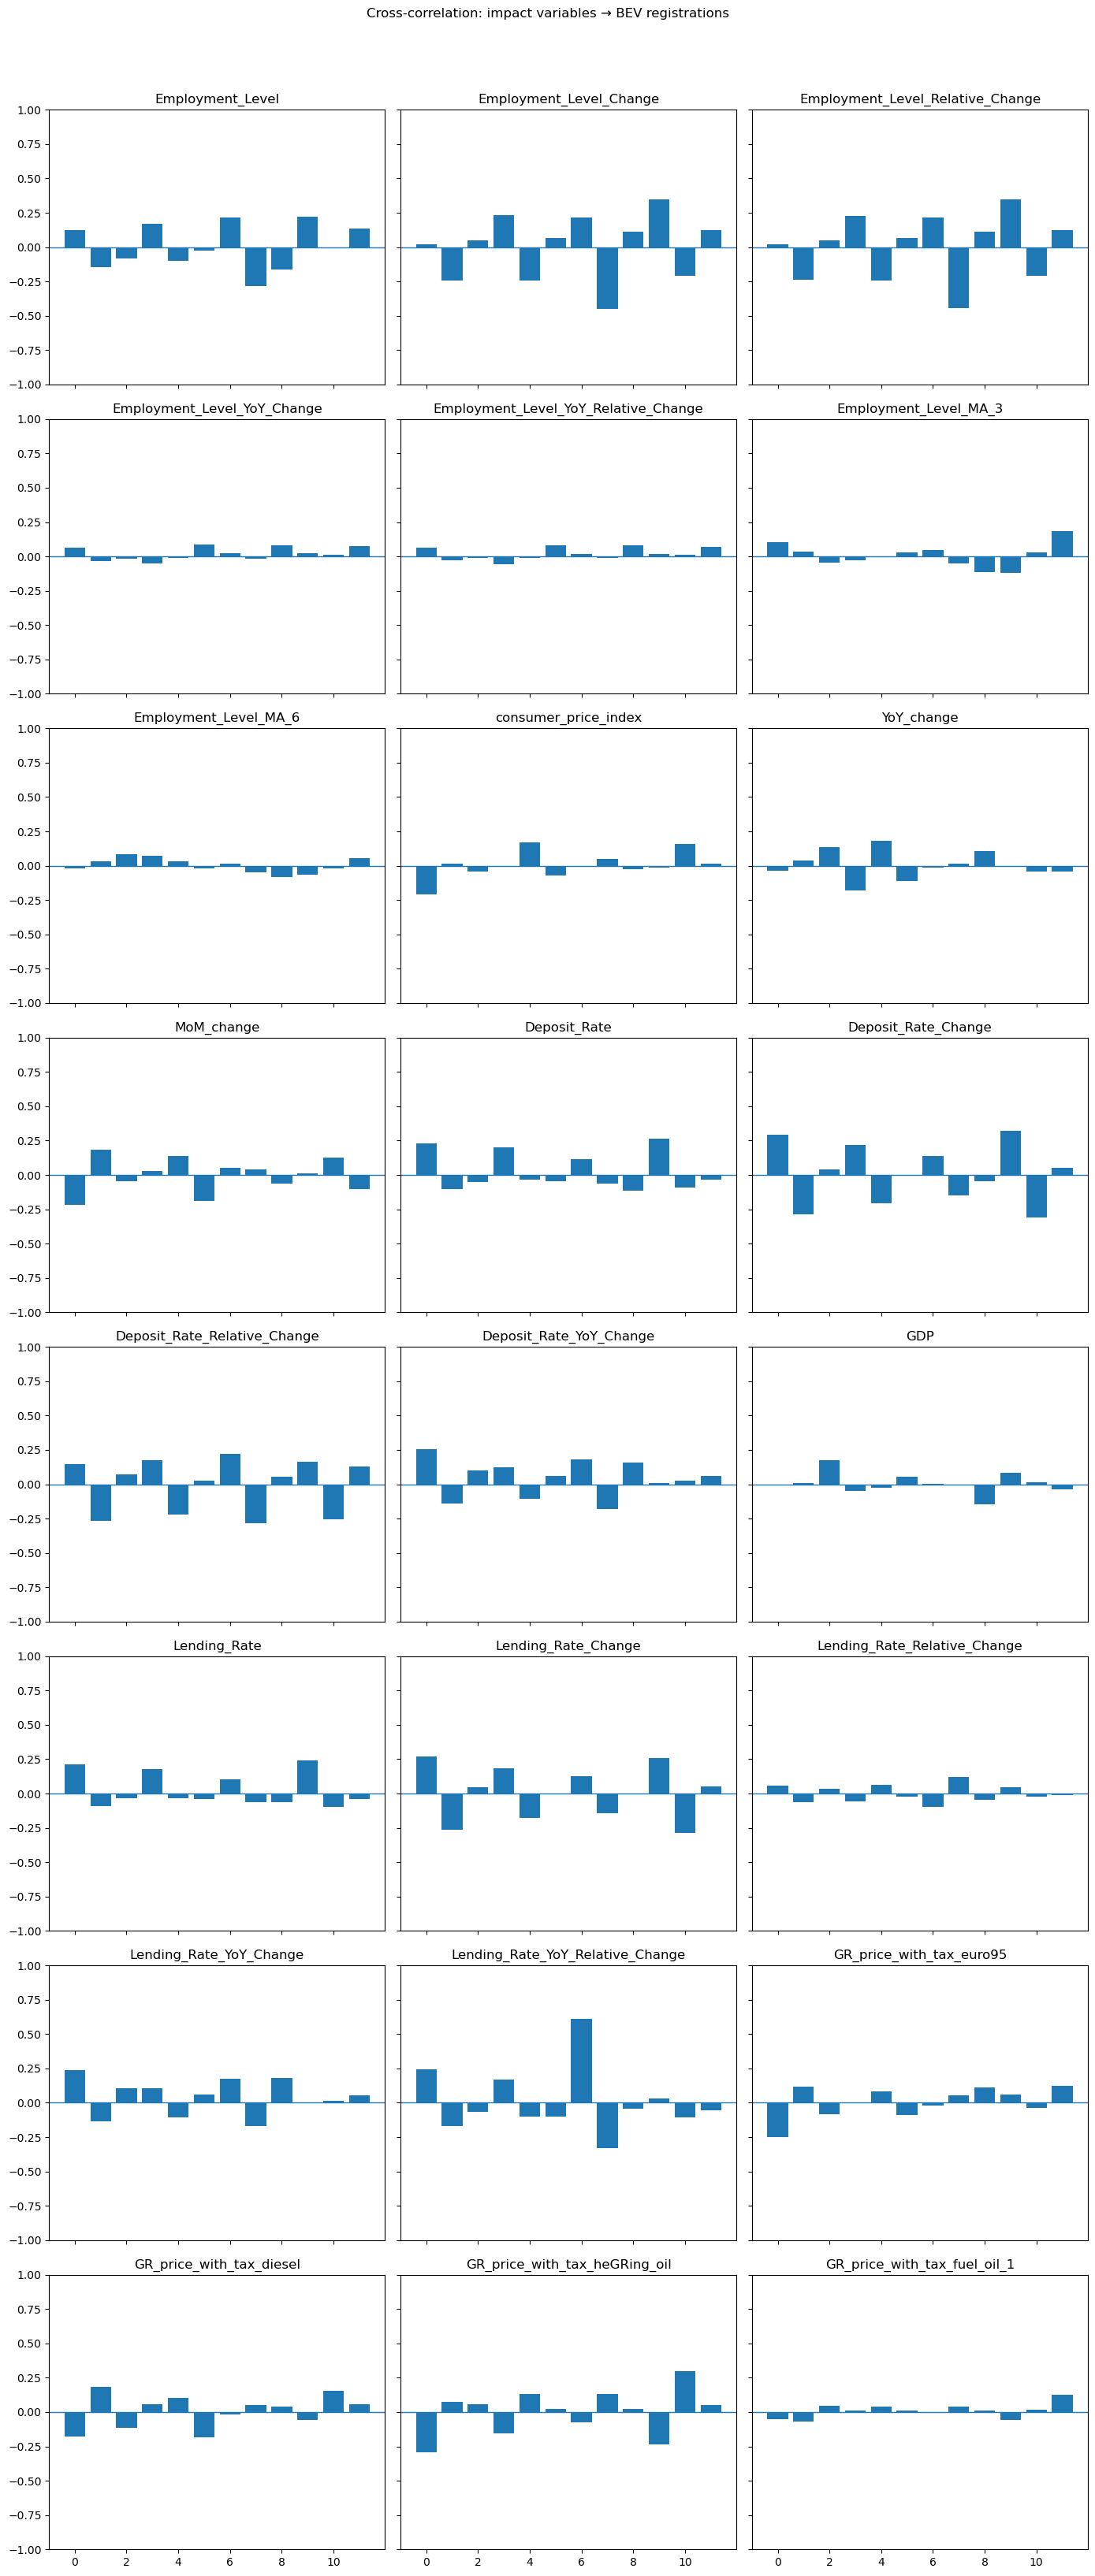

In [528]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Target series (choose type here)
target_type = "BEV"
target = df[df["type"] == target_type].groupby("Date")["Value"].mean()

# Impact columns (numeric only)
exclude = {"Date", "ts_key", "Value", "type", "oem"}
impact_cols = [c for c in df.select_dtypes("number").columns if c not in exclude]

n_cols = 3
n_rows = math.ceil(len(impact_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True, sharey=True)
axes = np.ravel(axes)

for ax, col in zip(axes, impact_cols):
    impact = df.groupby("Date")[col].mean()
    d = pd.concat([impact, target], axis=1).dropna().diff().dropna()
    d = (d - d.mean()) / d.std()

    lags = min(12, len(d) - 1)
    if lags < 2 or d.isna().any().any():
        ax.axis("off"); continue

    cc = ccf(d.iloc[:, 0], d.iloc[:, 1])[:lags]
    ax.bar(range(lags), cc)
    ax.axhline(0, linewidth=1)
    ax.set_title(col)
    ax.set_ylim(-1, 1)

for ax in axes[len(impact_cols):]:
    ax.remove()

fig.suptitle(f"Cross-correlation: impact variables → {target_type} registrations", y=1.02)
plt.tight_layout()
plt.show()

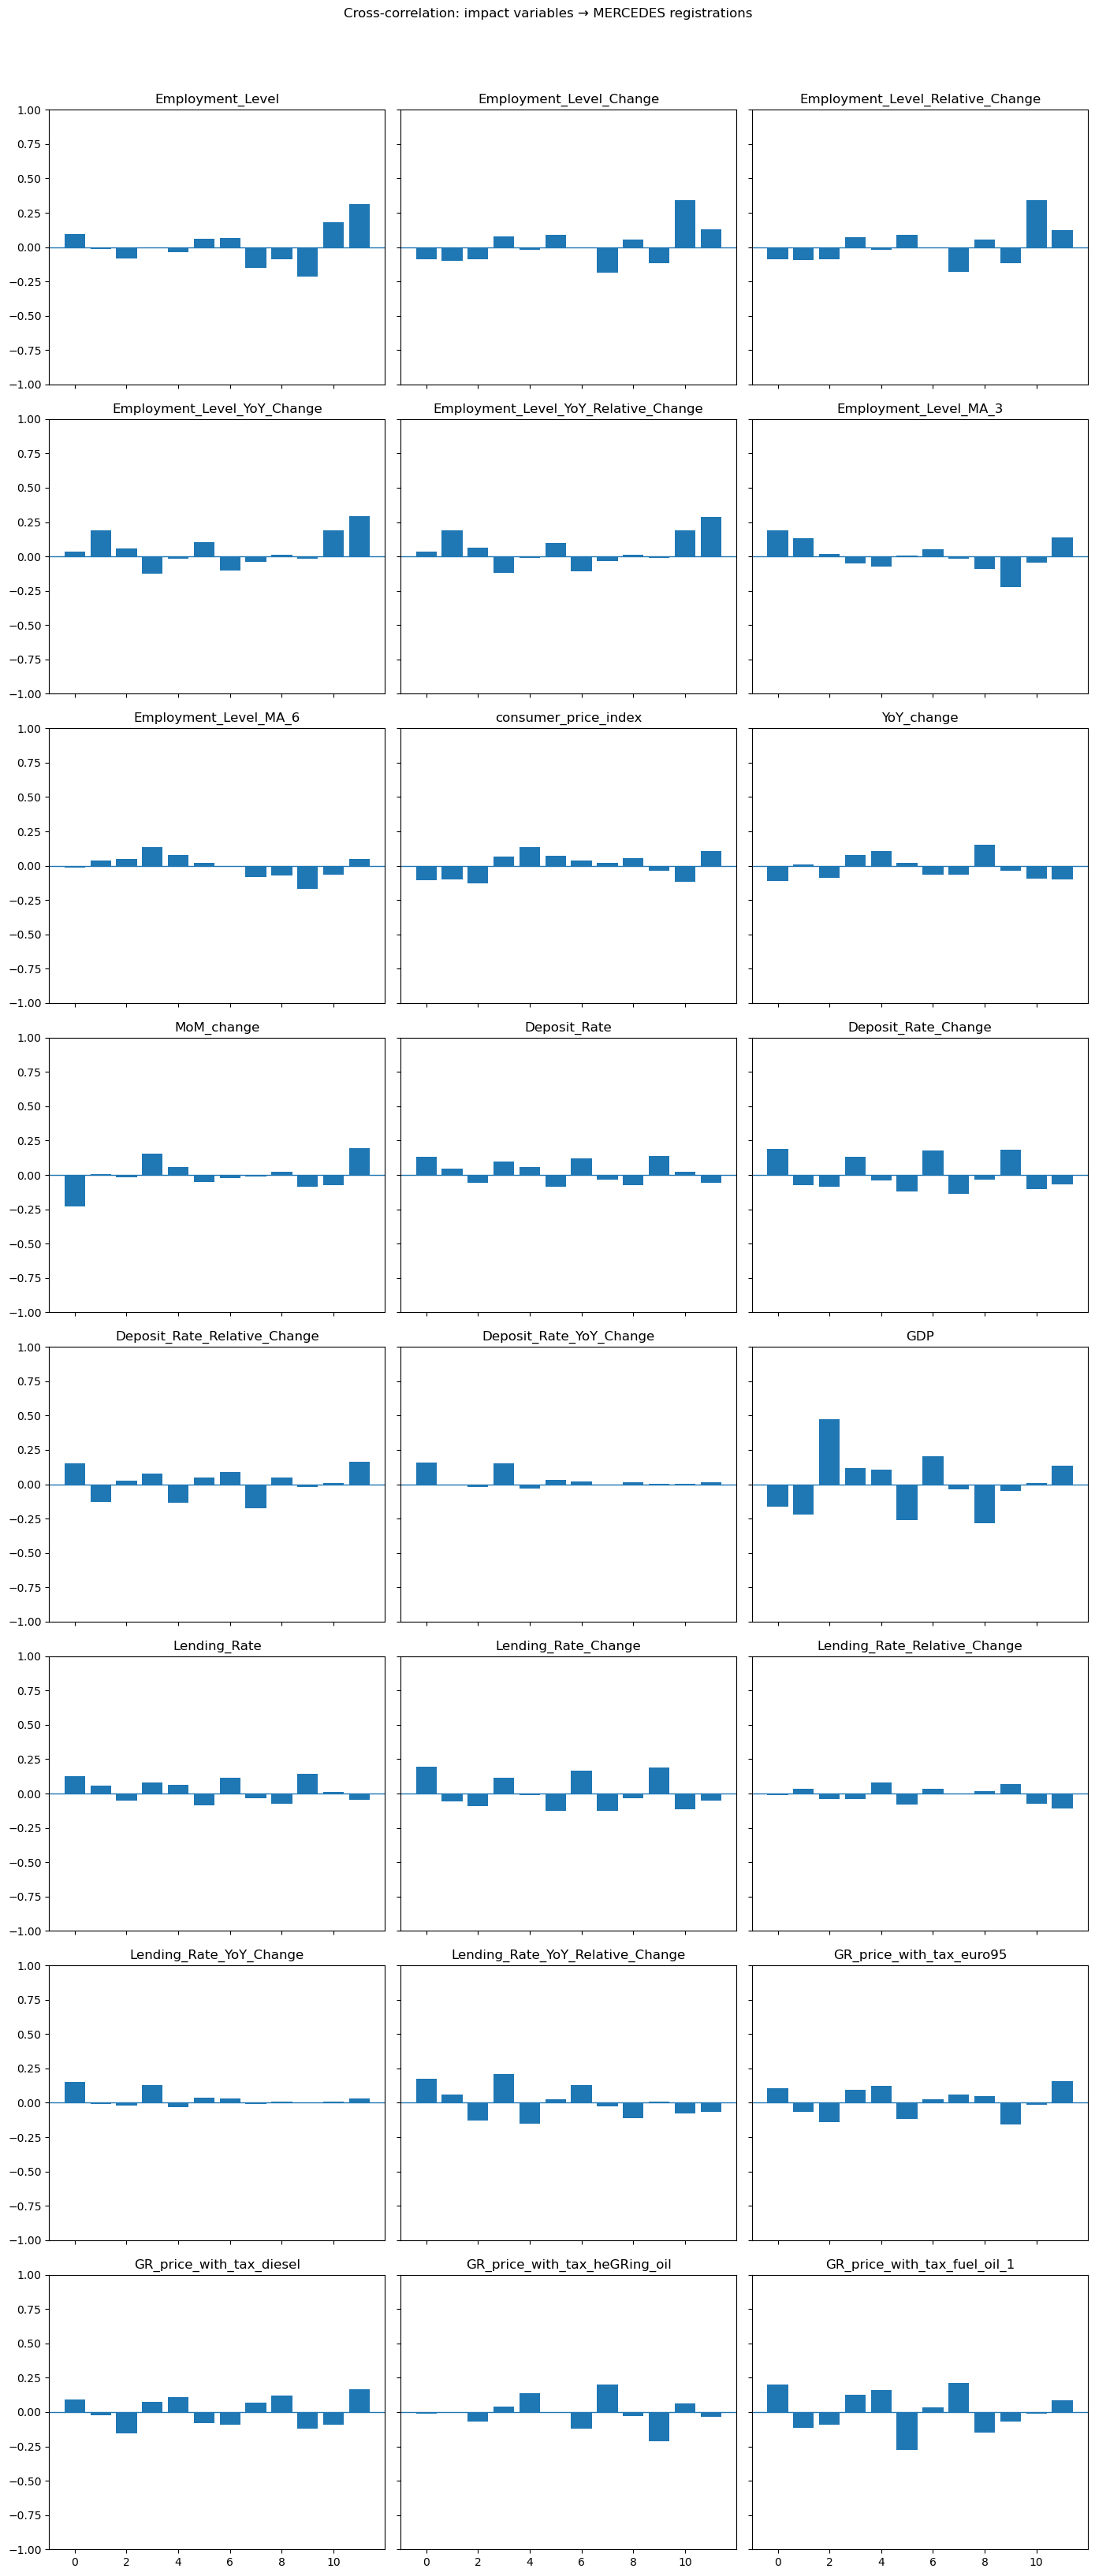

In [527]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Target series (choose type here)
target_oem = "MERCEDES"
target = df[df["oem"] == target_oem].groupby("Date")["Value"].mean()

# Impact columns (numeric only)
exclude = {"Date", "ts_key", "Value", "type", "oem"}
impact_cols = [c for c in df.select_dtypes("number").columns if c not in exclude]

n_cols = 3
n_rows = math.ceil(len(impact_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True, sharey=True)
axes = np.ravel(axes)

for ax, col in zip(axes, impact_cols):
    impact = df.groupby("Date")[col].mean()
    d = pd.concat([impact, target], axis=1).dropna().diff().dropna()
    d = (d - d.mean()) / d.std()

    lags = min(12, len(d) - 1)
    if lags < 2 or d.isna().any().any():
        ax.axis("off"); continue

    cc = ccf(d.iloc[:, 0], d.iloc[:, 1])[:lags]
    ax.bar(range(lags), cc)
    ax.axhline(0, linewidth=1)
    ax.set_title(col)
    ax.set_ylim(-1, 1)

for ax in axes[len(impact_cols):]:
    ax.remove()

fig.suptitle(f"Cross-correlation: impact variables → {target_oem} registrations", y=1.02)
plt.tight_layout()
plt.show()

In [525]:
Tesla_list = df[df['oem']=='MERCEDES']['ts_key'].unique().tolist()
Tesla_list

['MERCEDES_A-KLASSE_Diesel',
 'MERCEDES_A-KLASSE_Hybrid',
 'MERCEDES_VITO_Hybrid',
 'MERCEDES_VITO_Total',
 'MERCEDES_VITO_Electric_BEV',
 'MERCEDES_VITO_Petrol',
 'MERCEDES_A-KLASSE_All_Wheel_Drive',
 'MERCEDES_GLK, GLC_Total',
 'MERCEDES_ML-KLASSE, GLE_All_Wheel_Drive',
 'MERCEDES_ML-KLASSE, GLE_Diesel',
 'MERCEDES_AMG GT_Total',
 'MERCEDES_B-KLASSE_All_Wheel_Drive',
 'MERCEDES_B-KLASSE_Hybrid',
 'MERCEDES_B-KLASSE_Total',
 'MERCEDES_C-KLASSE_Convertibles',
 'MERCEDES_S-KLASSE_Diesel',
 'MERCEDES_S-KLASSE_Electric_BEV',
 'MERCEDES_S-KLASSE_Hybrid',
 'MERCEDES_S-KLASSE_Petrol',
 'MERCEDES_S-KLASSE_Total',
 'MERCEDES_ML-KLASSE, GLE_Hybrid',
 'MERCEDES_ML-KLASSE, GLE_Petrol',
 'MERCEDES_ML-KLASSE, GLE_Total',
 'MERCEDES_S-KLASSE_All_Wheel_Drive',
 'MERCEDES_GLK, GLC_Petrol',
 'MERCEDES_GLK, GLC_Hybrid',
 'MERCEDES_SL_All_Wheel_Drive',
 'MERCEDES_AMG GT_Petrol',
 'MERCEDES_CITAN_Petrol',
 'MERCEDES_B-KLASSE_Diesel',
 'MERCEDES_B-KLASSE_Petrol',
 'MERCEDES_C-KLASSE_All_Wheel_Drive',
 'MER

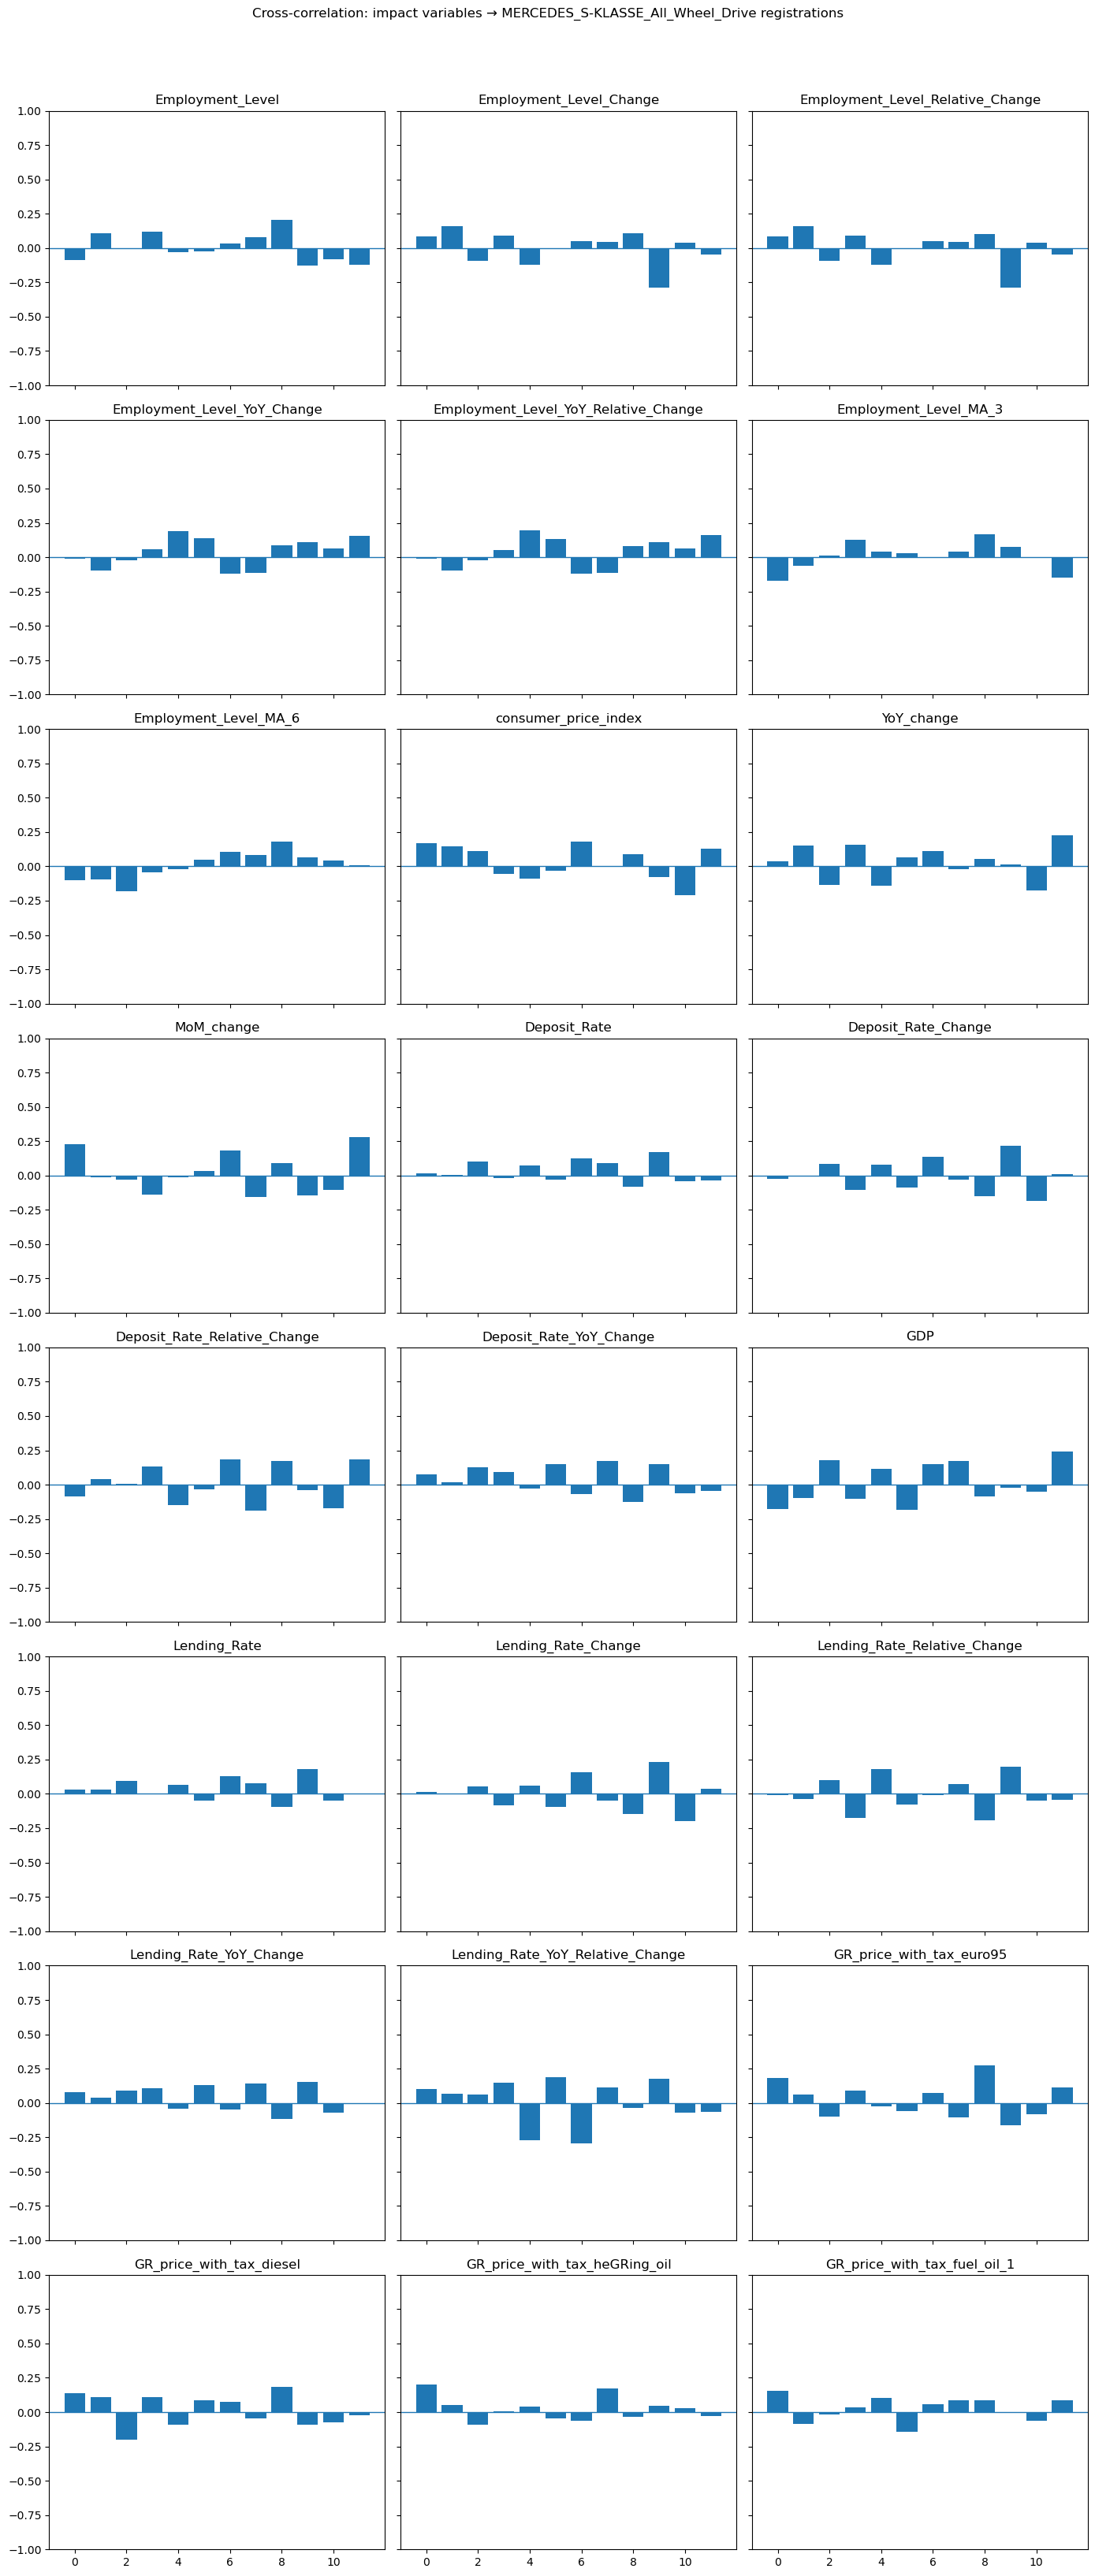

In [529]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Target series (choose type here)
target_model = "MERCEDES_S-KLASSE_All_Wheel_Drive"
target = df[df["ts_key"] == target_model].groupby("Date")["Value"].mean()

# Impact columns (numeric only)
exclude = {"Date", "ts_key", "Value", "type", "oem"}
impact_cols = [c for c in df.select_dtypes("number").columns if c not in exclude]

n_cols = 3
n_rows = math.ceil(len(impact_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True, sharey=True)
axes = np.ravel(axes)

for ax, col in zip(axes, impact_cols):
    impact = df.groupby("Date")[col].mean()
    d = pd.concat([impact, target], axis=1).dropna().diff().dropna()
    d = (d - d.mean()) / d.std()

    lags = min(12, len(d) - 1)
    if lags < 2 or d.isna().any().any():
        ax.axis("off"); continue

    cc = ccf(d.iloc[:, 0], d.iloc[:, 1])[:lags]
    ax.bar(range(lags), cc)
    ax.axhline(0, linewidth=1)
    ax.set_title(col)
    ax.set_ylim(-1, 1)

for ax in axes[len(impact_cols):]:
    ax.remove()

fig.suptitle(f"Cross-correlation: impact variables → {target_model} registrations", y=1.02)
plt.tight_layout()
plt.show()